# Loading Modules

In [1]:
import os
import sys 

sys.path.append(os.path.abspath('../scripts'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import utils
import plots

warnings.filterwarnings('ignore')


In [3]:
# Load the data

data_path = "data/Week2_challenge_data_source.xlsx"
data = pd.read_excel(data_path)

display(
    data.head(),
    data.info(),
    data.describe()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

None

Start       Start ms  \
count                         150000  150000.000000   
mean   2019-04-26 12:36:38.953740032     499.188200   
min              2019-04-04 12:01:18       0.000000   
25%    2019-04-25 00:26:00.750000128     250.000000   
50%       2019-04-26 08:51:24.500000     499.000000   
75%    2019-04-27 18:18:59.750000128     749.000000   
max              2019-04-29 07:28:43     999.000000   
std                              NaN     288.611834   

                                 End         End ms     Dur. (ms)  \
count                         150000  150000.000000  1.500000e+05   
mean   2019-04-27 17:40:08.059673344     498.800880  1.046086e+05   
min              2019-04-24 22:59:58       0.000000  7.142000e+03   
25%       2019-04-26 07:30:11.500000     251.000000  5.744050e+04   
50%              2019-04-27 23:02:05     500.000000  8.639900e+04   
75%       2019-04-29 07:15:07.500000     750.000000  1.324302e+05   
max              2019-04-30 23:59:27     999.000000  1.859336e+06   
std                              NaN     288.097653  8.103762e+04   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  \
count  1.494310e+05   1.489350e+05  1.494290e+05    122172.000000   
mean   2.082016e+14   4.188282e+10  4.847455e+13       109.795706   
min    2.040471e+14   3.360100e+10  4.400152e+11         0.000000   
25%    2.082014e+14   3.365130e+10  3.546071e+13        32.000000   
50%    2.082015e+14   3.366371e+10  3.572201e+13        45.000000   
75%    2.082018e+14   3.368349e+10  8.611970e+13        70.000000   
max    2.140743e+14   8.823971e+14  9.900120e+13     96923.000000   
std    2.148809e+10   2.447443e+12  2.241637e+13       619.782739   

       Avg RTT UL (ms)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count    122189.000000  ...        1.500010e+05        1.500010e+05   
mean         17.662883  ...        1.163407e+07        1.100941e+07   
min           0.000000  ...        5.300000e+01        1.050000e+02   
25%           2.000000  ...        5.833501e+06        5.517965e+06   
50%           5.000000  ...        1.161602e+07        1.101345e+07   
75%          15.000000  ...        1.744852e+07        1.651556e+07   
max        7120.000000  ...        2.325910e+07        2.201196e+07   
std          84.793524  ...        6.710569e+06        6.345423e+06   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count        1.500010e+05        1.500010e+05       1.500010e+05   
mean         1.162685e+07        1.100175e+07       4.220447e+08   
min          4.200000e+01        3.500000e+01       2.516000e+03   
25%          5.777156e+06        5.475981e+06       2.104733e+08   
50%          1.164222e+07        1.099638e+07       4.234081e+08   
75%          1.747048e+07        1.650727e+07       6.331742e+08   
max          2.325919e+07        2.201196e+07       8.434419e+08   
std          6.725218e+06        6.359490e+06       2.439675e+08   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count       1.500010e+05      1.500010e+05      1.500010e+05   
mean        8.288398e+06      4.211005e+08      8.264799e+06   
min         5.900000e+01      3.290000e+03      1.480000e+02   
25%         4.128476e+06      2.101869e+08      4.145943e+06   
50%         8.291208e+06      4.218030e+08      8.267071e+06   
75%         1.243162e+07      6.316918e+08      1.238415e+07   
max         1.655879e+07      8.434425e+08      1.655882e+07   
std         4.782700e+06      2.432050e+08      4.769004e+06   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.500000e+05      1.500000e+05  
mean       4.112121e+07      4.546434e+08  
min        2.866892e+06      7.114041e+06  
25%        3.322201e+07      2.431068e+08  
50%        4.114331e+07      4.558411e+08  
75%        4.903424e+07      6.657055e+08  
max        7.833131e+07      9.029696e+08  
std        1.127639e+07      2.441429e+08  

[8 rows x 51 columns]

### Observations:
1. **Number of Rows and Columns**:
   - The dataset has 150,001 rows and 55 columns.

2. **Missing Data**:
   - Several columns have missing values. For instance:
     - Columns like `Avg RTT DL (ms)` and `Avg RTT UL (ms)` have ~122k non-null entries out of 150k.
     - `TCP DL Retrans. Vol (Bytes)` and `TCP UL Retrans. Vol (Bytes)` have even fewer entries.
   - Columns like `Social Media DL (Bytes)` and `Total DL (Bytes)` have complete data.

3. **Data Types**:
   - Most columns are numeric (`float64`), with a few categorical (`object`) and datetime (`datetime64[ns]`) columns.

4. **Potential Redundancies**:
   - Some columns like `Dur. (ms)` and `Dur. (ms).1` appear to be duplicated or redundant.

5. **Key Variables**:
   - Usage metrics such as `Avg Bearer TP DL (kbps)`, `Avg Bearer TP UL (kbps)`, and `Total DL/UL (Bytes)` are critical for identifying user behavior.
   - Columns such as `Handset Manufacturer` and `Handset Type` can provide insights into device preferences.

6. **Customer Segmentation Opportunities**:
   - Metrics like `Social Media DL (Bytes)` or `Gaming DL (Bytes)` could help identify customer usage patterns.


# Task 1: User Overview Analysis 



## Task 1.1 - 

Your employer wants to have an overview of the users’ behavior on those applications.   
Aggregate per user the following information in the column  
- number of xDR sessions
- Session duration
- the total download (DL) and upload (UL) data
- the total data volume (in Bytes) during this session for each application

In [4]:
# Updated metrics dictionary
metrics_to_aggregate = {
    'xDR_sessions': 'Bearer Id',  # Count unique sessions
    'Total_Session_Duration': 'Dur. (ms)',  # Sum session durations
    'Total_Data': ('Total DL (Bytes)', 'Total UL (Bytes)'),  # Sum total data volume
    'Social_Media_Data': ('Social Media DL (Bytes)', 'Social Media UL (Bytes)'),
    'Google_Data': ('Google DL (Bytes)', 'Google UL (Bytes)'),
    'Email_Data': ('Email DL (Bytes)', 'Email UL (Bytes)'),
    'YouTube_Data': ('Youtube DL (Bytes)', 'Youtube UL (Bytes)'),
    'Netflix_Data': ('Netflix DL (Bytes)', 'Netflix UL (Bytes)'),
    'Gaming_Data': ('Gaming DL (Bytes)', 'Gaming UL (Bytes)'),
    'Other_Data': ('Other DL (Bytes)', 'Other UL (Bytes)')
}

# Call the function
group_col = 'MSISDN/Number'

user_metrics = utils.aggregate_user_metrics(data, group_col, metrics_to_aggregate)

display(
    user_metrics.shape,
    user_metrics.sample(20),
    user_metrics.describe()
)


(106856, 11)

MSISDN/Number  xDR_sessions  Total_Session_Duration    Total_Data  \
19210    3.363888e+10             4                149649.0  2.628613e+09   
56830    3.366461e+10             2                221918.0  7.072423e+08   
64004    3.366679e+10             2                218728.0  1.389411e+09   
34778    3.365922e+10             2                 48548.0  1.382958e+09   
55563    3.366423e+10             1                 31300.0  5.424095e+08   
68201    3.366815e+10             1                 87845.0  4.749519e+08   
60080    3.366546e+10             1                 86399.0  8.123629e+08   
50021    3.366278e+10             2                110613.0  8.213842e+08   
77477    3.367810e+10             1                 93623.0  2.250222e+08   
28020    3.365182e+10             1                141034.0  6.219908e+08   
72631    3.366964e+10             2                202129.0  1.125935e+09   
62784    3.366638e+10             1                 86296.0  6.476249e+08   
64044    3.366680e+10             1                 89280.0  4.250399e+08   
102856   3.377128e+10             1                262665.0  5.459746e+08   
91106    3.375360e+10             1                 86399.0  6.382104e+08   
103584   3.377980e+10             1                141330.0  1.085683e+08   
84841    3.369828e+10             1                 86399.0  5.580425e+08   
44663    3.366155e+10             1                 94637.0  2.191247e+08   
9582     3.362002e+10             1                107434.0  4.983338e+08   
72281    3.366952e+10             3                147438.0  1.600618e+09   

        Social_Media_Data  Google_Data  Email_Data  YouTube_Data  \
19210           7421383.0   34979558.0   7509607.0    66119258.0   
56830           1869545.0   26629211.0   3700197.0    24725890.0   
64004           3844450.0    8548267.0   5140280.0    34370108.0   
34778           3117956.0   22917120.0   4566297.0    36330684.0   
55563           1872497.0    7903903.0   2732844.0    27310241.0   
68201           1047190.0    7477965.0   3765504.0    32415354.0   
60080           1886166.0    2210341.0   2976126.0    44095631.0   
50021           4332135.0   14867023.0   3699478.0    36399819.0   
77477            467275.0   11225663.0   1096328.0    32263298.0   
28020           2550375.0    2174878.0   1471719.0    29215215.0   
72631           5749474.0   13416203.0   5024845.0    35286488.0   
62784           1507531.0   13983699.0   1498851.0    29756783.0   
64044           1512528.0    8798755.0   3300980.0    23727651.0   
102856          2000462.0    9775838.0    657178.0    34027503.0   
91106           1627044.0   12626115.0    310584.0    24248209.0   
103584           385335.0    9688277.0   2527907.0    30491631.0   
84841           2217809.0   10803179.0   2479285.0    13173635.0   
44663            451080.0    5791826.0   4039749.0    38849975.0   
9582            2630453.0   10247637.0   2000801.0     8240197.0   
72281           3646009.0   19904575.0   7211646.0    48005616.0   

        Netflix_Data   Gaming_Data    Other_Data  
19210     98127678.0  2.374223e+09  2.145786e+09  
56830     59077970.0  5.771556e+08  7.022515e+08  
64004     70142043.0  1.244713e+09  9.232210e+08  
34778     56608800.0  1.240754e+09  6.887294e+08  
55563     43148486.0  4.448241e+08  1.906397e+08  
68201     33442975.0  3.829362e+08  7.972486e+08  
60080     31031052.0  7.205231e+08  5.141806e+08  
50021     42781747.0  7.041912e+08  1.144557e+09  
77477     20823290.0  1.511670e+08  6.810372e+08  
28020     26033769.0  5.493114e+08  3.625967e+08  
72631     38238719.0  1.014290e+09  2.196452e+08  
62784      5890275.0  5.808362e+08  1.803505e+08  
64044     18284326.0  3.693703e+08  6.176010e+08  
102856    30165222.0  4.564819e+08  4.043534e+08  
91106     28402045.0  5.682752e+08  6.601236e+08  
103584    28206673.0  2.150039e+07  7.945369e+08  
84841     28413652.0  4.970699e+08  7.306714e+08  
44663      8306068.0  1.562096e+08  8.20543

MSISDN/Number   xDR_sessions  Total_Session_Duration    Total_Data  \
count   1.068560e+05  106856.000000            1.068560e+05  1.068560e+05   
mean    4.511474e+10       1.379951            1.461672e+05  6.909621e+08   
std     2.889423e+12       0.776847            1.863587e+05  4.910559e+08   
min     3.360100e+10       1.000000            7.142000e+03  3.324901e+07   
25%     3.365088e+10       1.000000            7.130800e+04  3.585499e+08   
50%     3.366365e+10       1.000000            1.027400e+05  6.179231e+08   
75%     3.368344e+10       2.000000            1.727990e+05  8.574351e+08   
max     8.823971e+14      18.000000            1.855375e+07  8.846226e+09   

       Social_Media_Data   Google_Data    Email_Data  YouTube_Data  \
count       1.068560e+05  1.068560e+05  1.068560e+05  1.068560e+05   
mean        2.547967e+06  1.088243e+07  3.148796e+06  3.155840e+07   
std         1.908038e+06  7.544861e+06  2.222400e+06  2.129492e+07   
min         1.563000e+03  4.033000e+04  1.817600e+04  7.890300e+04   
25%         1.211282e+06  5.942636e+06  1.674481e+06  1.863109e+07   
50%         2.303756e+06  9.586153e+06  2.799824e+06  2.680038e+07   
75%         3.307509e+06  1.321474e+07  3.847198e+06  3.792798e+07   
max         4.337478e+07  1.521919e+08  4.241878e+07  4.529588e+08   

       Netflix_Data   Gaming_Data    Other_Data  
count  1.068560e+05  1.068560e+05  1.068560e+05  
mean   3.153833e+07  5.997690e+08  5.985088e+08  
std    2.128956e+07  4.491505e+08  4.489221e+08  
min    1.845690e+05  3.063580e+05  1.490450e+05  
25%    1.855597e+07  2.880631e+08  2.855599e+08  
50%    2.671889e+07  5.423492e+08  5.398323e+08  
75%    3.797696e+07  7.773041e+08  7.753975e+08  
max    3.995191e+08  7.749432e+09  8.167878e+09

### Observations:
1. **Number of Users**:
   - The aggregated data shows 106,856 users (`MSISDN/Number`), which represents unique identifiers.

2. **xDR Sessions**:
   - The average user has approximately 1.38 sessions, with a maximum of 18 sessions.

3. **Session Duration**:
   - The mean session duration is approximately 146,167 ms (or about 146 seconds).
   - There's significant variance, as the maximum session duration is ~18.5 million ms (about 5 hours).

4. **Total Data Volume**:
   - Users download/upload an average of ~691 MB per session, with the heaviest users consuming ~8.8 GB.
   - Applications like `Netflix`, `Gaming`, and `YouTube` are the largest data consumers on average.

5. **Application-Specific Data**:
   - Application data volumes (`Netflix_Data`, `Gaming_Data`, etc.) align with usage trends in telecommunications:
     - `Netflix` and `Gaming` are high-data-consuming applications.
     - `Google` and `Email` have lower data consumption compared to multimedia applications.

### Interpretation:
1. **Heavy Users**:
   - Some users have an exceptionally high number of sessions or consume significant amounts of data, which may represent power users or users with premium plans.
   - Example: A user with `18 sessions` and over `8 GB` of data usage.

2. **Application Usage Patterns**:
   - High data consumption for `Netflix` and `Gaming` suggests these services are prime candidates for targeted marketing or premium packages.
   - Moderate usage of `Social Media` and `Google` indicates widespread, consistent usage across users.

3. **Session Counts and Engagement**:
   - Users with a higher session count could represent more engaged customers, potentially indicative of customer loyalty or higher service reliance.


## Task 1.2 

Conduct an exploratory data analysis on those data & communicate useful insights. Ensure that you identify and treat all missing values and outliers in the dataset by replacing them with the mean or any possible solution of the corresponding column.

### Task 1.2.1: Describe All Relevant Variables and Associated Data Types

In [5]:
# Separate variables into relevant categories
quantitative_vars = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()
datetime_vars = data.select_dtypes(include=['datetime']).columns.tolist()

# Summarize variable types
variable_summary = {
    "Quantitative Variables": quantitative_vars,
    "Categorical Variables": categorical_vars,
    "Datetime Variables": datetime_vars
}

# Check for missing values
missing_values = data.isnull().sum().reset_index()
missing_values.columns = ['Variable', 'Missing_Count']
missing_values['Missing_Percentage'] = (missing_values['Missing_Count'] / len(data)) * 100
missing_values = missing_values[missing_values['Missing_Count'] > 0]

display(
    "Variable Summary", variable_summary,
    "Missing Values", missing_values
)


'Variable Summary'

{'Quantitative Variables': ['Start ms',
  'End ms',
  'Dur. (ms)',
  'IMSI',
  'MSISDN/Number',
  'IMEI',
  'Avg RTT DL (ms)',
  'Avg RTT UL (ms)',
  'Avg Bearer TP DL (kbps)',
  'Avg Bearer TP UL (kbps)',
  'TCP DL Retrans. Vol (Bytes)',
  'TCP UL Retrans. Vol (Bytes)',
  'DL TP < 50 Kbps (%)',
  '50 Kbps < DL TP < 250 Kbps (%)',
  '250 Kbps < DL TP < 1 Mbps (%)',
  'DL TP > 1 Mbps (%)',
  'UL TP < 10 Kbps (%)',
  '10 Kbps < UL TP < 50 Kbps (%)',
  '50 Kbps < UL TP < 300 Kbps (%)',
  'UL TP > 300 Kbps (%)',
  'HTTP DL (Bytes)',
  'HTTP UL (Bytes)',
  'Activity Duration DL (ms)',
  'Activity Duration UL (ms)',
  'Dur. (ms).1',
  'Nb of sec with 125000B < Vol DL',
  'Nb of sec with 1250B < Vol UL < 6250B',
  'Nb of sec with 31250B < Vol DL < 125000B',
  'Nb of sec with 37500B < Vol UL',
  'Nb of sec with 6250B < Vol DL < 31250B',
  'Nb of sec with 6250B < Vol UL < 37500B',
  'Nb of sec with Vol DL < 6250B',
  'Nb of sec with Vol UL < 1250B',
  'Social Media DL (Bytes)',
  'Social Media 

'Missing Values'

Variable  Missing_Count  \
1                                      Start              1   
2                                   Start ms              1   
3                                        End              1   
4                                     End ms              1   
5                                  Dur. (ms)              1   
6                                       IMSI            570   
7                              MSISDN/Number           1066   
8                                       IMEI            572   
9                         Last Location Name           1153   
10                           Avg RTT DL (ms)          27829   
11                           Avg RTT UL (ms)          27812   
12                   Avg Bearer TP DL (kbps)              1   
13                   Avg Bearer TP UL (kbps)              1   
14               TCP DL Retrans. Vol (Bytes)          88146   
15               TCP UL Retrans. Vol (Bytes)          96649   
16                       DL TP < 50 Kbps (%)            754   
17            50 Kbps < DL TP < 250 Kbps (%)            754   
18             250 Kbps < DL TP < 1 Mbps (%)            754   
19                        DL TP > 1 Mbps (%)            754   
20                       UL TP < 10 Kbps (%)            792   
21             10 Kbps < UL TP < 50 Kbps (%)            792   
22            50 Kbps < UL TP < 300 Kbps (%)            792   
23                      UL TP > 300 Kbps (%)            792   
24                           HTTP DL (Bytes)          81474   
25                           HTTP UL (Bytes)          81810   
26                 Activity Duration DL (ms)              1   
27                 Activity Duration UL (ms)              1   
28                               Dur. (ms).1              1   
29                      Handset Manufacturer            572   
30                              Handset Type            572   
31           Nb of sec with 125000B < Vol DL          97538   
32     Nb of sec with 1250B < Vol UL < 6250B          92894   
33  Nb of sec with 31250B < Vol DL < 125000B          93586   
34            Nb of sec with 37500B < Vol UL         130254   
35    Nb of sec with 6250B < Vol DL < 31250B          88317   
36    Nb of sec with 6250B < Vol UL < 37500B         111843   
37             Nb of sec with Vol DL < 6250B            755   
38             Nb of sec with Vol UL < 1250B            793   
53                          Total UL (Bytes)              1   
54                          Total DL (Bytes)              1   

    Missing_Percentage  
1             0.000667  
2             0.000667  
3             0.000667  
4             0.000667  
5             0.000667  
6             0.379997  
7             0.710662  
8             0.381331  
9             0.768662  
10           18.552543  
11           18.541210  
12            0.000667  
13            0.000667  
14           58.763608  
15           64.432237  
16            0.502663  
17            0.502663  
18            0.502663  
19            0.502663  
20            0.527996  
21            0.527996  
22            0.527996  
23            0.527996  
24           54.315638  
25           54.539636  
26            0.000667  
27            0.000667  
28            0.000667  
29            0.381331  
30            0.381331  
31           65.024900  
32           61.928920  
33           62.390251  
34           86.835421  
35           58.877607  
36           74.561503  
37            0.503330  
38            0.528663  
53            0.000667  
54            0.000667


### **Summary of Variables**:
- **Quantitative Variables (Numeric)**:
  - These include all metrics for session durations, data volumes (e.g., `Total DL (Bytes)`), and application-specific data usage (e.g., `Social Media DL (Bytes)`).
  - Key variables for analysis:
    - `Dur. (ms)` (Session Duration)
    - `Total DL (Bytes)` and `Total UL (Bytes)` (Total Data Usage)
    - Application-specific data: `Netflix DL`, `Gaming DL`, etc.
    
- **Categorical Variables**:
  - Examples: `Bearer Id`, `Last Location Name`, `Handset Manufacturer`, `Handset Type`.
  - Useful for grouping or segmenting users by device types or locations.

- **Datetime Variables**:
  - `Start` and `End`: Represent session start and end times. These can be used to compute additional insights like session duration or peak usage times.


### **Missing Values**:
The dataset contains several columns with missing values:
- **Critical Variables**:
  - `IMSI`, `MSISDN/Number`, `IMEI`: These identifiers have minimal missing values (~0.38% to ~0.71%).
  - **Action**: Impute missing values with the most frequent values (if categorical) or drop rows if deemed negligible.
  
- **High Missingness (>50%)**:
  - Columns like `TCP DL Retrans. Vol (Bytes)` and `HTTP DL (Bytes)` have over 50% missing data.
  - **Action**: Exclude these columns if their missingness significantly affects analysis.

- **Moderate Missingness**:
  - Variables like `Avg RTT DL (ms)` (~18.5%) may be imputed with the column mean or median.


In [6]:
# Step 1: Calculate total session duration and total data for each user
data['Total_Data'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

user_aggregates = data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total_Data': 'sum'
}).reset_index()
user_aggregates.rename(columns={'Dur. (ms)': 'Total_Duration'}, inplace=True)

# Step 2: Segment users into decile classes
user_aggregates['Decile'] = pd.qcut(
    user_aggregates['Total_Duration'], 
    q=10, 
    labels=[f"Decile {i+1}" for i in range(10)]
)

# Step 3: Filter for the top 5 deciles
top_deciles = user_aggregates[user_aggregates['Decile'].isin(['Decile 6', 'Decile 7', 'Decile 8', 'Decile 9', 'Decile 10'])]

# Step 4: Compute total data per decile
decile_summary = top_deciles.groupby('Decile').agg({
    'Total_Duration': 'sum',
    'Total_Data': 'sum'
}).sort_index()


display(
    user_aggregates.head(),
    top_deciles.head(),
    decile_summary
)

MSISDN/Number  Total_Duration    Total_Data    Decile
0   3.360100e+10        116720.0  8.786906e+08  Decile 6
1   3.360100e+10        181230.0  1.568596e+08  Decile 8
2   3.360100e+10        134969.0  5.959665e+08  Decile 7
3   3.360101e+10         49878.0  4.223207e+08  Decile 2
4   3.360101e+10         37104.0  1.457411e+09  Decile 2

MSISDN/Number  Total_Duration   Total_Data    Decile
0   3.360100e+10        116720.0  878690574.0  Decile 6
1   3.360100e+10        181230.0  156859643.0  Decile 8
2   3.360100e+10        134969.0  595966483.0  Decile 7
5   3.360101e+10        253983.0  615217221.0  Decile 9
6   3.360101e+10        128360.0  654723066.0  Decile 6

Total_Duration    Total_Data
Decile                                 
Decile 1     0.000000e+00  0.000000e+00
Decile 2     0.000000e+00  0.000000e+00
Decile 3     0.000000e+00  0.000000e+00
Decile 4     0.000000e+00  0.000000e+00
Decile 5     0.000000e+00  0.000000e+00
Decile 6     1.254869e+09  6.426251e+12
Decile 7     1.579210e+09  6.152478e+12
Decile 8     1.869399e+09  7.822234e+12
Decile 9     2.486470e+09  9.305495e+12
Decile 10    5.106534e+09  1.486393e+13

### **Interpretation**

1. **Decile Overview**:
   - The decile segmentation divides users into 10 equal groups.
   - Only the top 5 deciles (`Decile 6` to `Decile 10`) contain meaningful data, as lower deciles have zero values in both `Total_Duration` and `Total_Data`.

2. **Top Deciles Insights**:
   - **Decile 10**: Represents the users with the highest session duration (`5.1 billion ms` ~ 1,417 hours) and the largest total data usage (`14.8 TB`).
   - **Decile 9**: Slightly less duration (`2.48 billion ms`) but still a significant total data usage (`9.3 TB`).
   - The total duration and data consumption decrease as you move toward `Decile 6`.

3. **Decile Comparisons**:
   - Users in higher deciles (e.g., `Decile 9` and `Decile 10`) are likely heavy users, generating more traffic and contributing significantly to network load and revenue.

### **Task 1.2.3**
Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

In [7]:
# Select relevant quantitative variables
quantitative_columns = [
    'Dur. (ms)', 
    'Total_Data', 
    'Social Media DL (Bytes)', 
    'Google DL (Bytes)', 
    'Email DL (Bytes)', 
    'Youtube DL (Bytes)', 
    'Netflix DL (Bytes)', 
    'Gaming DL (Bytes)', 
    'Other DL (Bytes)'
]


# Compute basic statistics for the quantitative variables
basic_stats = data[quantitative_columns].describe().T

# Add additional metrics: range (max - min) and coefficient of variation (CV)
basic_stats['Range'] = basic_stats['max'] - basic_stats['min']
basic_stats['Coefficient of Variation (CV)'] = basic_stats['std'] / basic_stats['mean']


display(
    "Basic Statistics", basic_stats
)


'Basic Statistics'

count          mean           std         min  \
Dur. (ms)                150000.0  1.046086e+05  8.103762e+04      7142.0   
Total_Data               150000.0  4.957646e+08  2.443818e+08  28956107.0   
Social Media DL (Bytes)  150001.0  1.795322e+06  1.035482e+06        12.0   
Google DL (Bytes)        150001.0  5.750753e+06  3.309097e+06       207.0   
Email DL (Bytes)         150001.0  1.791729e+06  1.035840e+06        14.0   
Youtube DL (Bytes)       150001.0  1.163407e+07  6.710569e+06        53.0   
Netflix DL (Bytes)       150001.0  1.162685e+07  6.725218e+06        42.0   
Gaming DL (Bytes)        150001.0  4.220447e+08  2.439675e+08      2516.0   
Other DL (Bytes)         150001.0  4.211005e+08  2.432050e+08      3290.0   

                                 25%          50%           75%          max  \
Dur. (ms)                    57440.5      86399.0  1.324302e+05    1859336.0   
Total_Data               284475924.0  496861101.5  7.065059e+08  955984776.0   
Social Media DL (Bytes)     899148.0    1794369.0  2.694938e+06    3586064.0   
Google DL (Bytes)          2882393.0    5765829.0  8.623552e+06   11462832.0   
Email DL (Bytes)            892793.0    1793505.0  2.689327e+06    3586146.0   
Youtube DL (Bytes)         5833501.0   11616019.0  1.744852e+07   23259098.0   
Netflix DL (Bytes)         5777156.0   11642217.0  1.747048e+07   23259189.0   
Gaming DL (Bytes)        210473253.0  423408104.0  6.331742e+08  843441889.0   
Other DL (Bytes)         210186872.0  421803006.0  6.316918e+08  843442489.0   

                               Range  Coefficient of Variation (CV)  
Dur. (ms)                  1852194.0                       0.774675  
Total_Data               927028669.0                       0.492939  
Social Media DL (Bytes)    3586052.0                       0.576767  
Google DL (Bytes)         11462625.0                       0.575420  
Email DL (Bytes)           3586132.0                       0.578123  
Youtube DL (Bytes)        23259045.0                       0.576803  
Netflix DL (Bytes)        23259147.0                       0.578421  
Gaming DL (Bytes)        843439373.0                       0.578061  
Other DL (Bytes)         843439199.0                       0.577546

### **Key Observations**

#### 1. **`Dur. (ms)` (Session Duration)**
- **Mean**: ~104,609 ms (about 1.75 minutes).
- **Median (50%)**: ~86,399 ms, indicating that most sessions are slightly shorter than the average.
- **Standard Deviation**: ~81,037 ms, showing considerable variability in session durations.
- **Max**: ~1,859,336 ms (~31 minutes), representing heavy session usage.
- **Range**: ~1.85 million ms, highlighting the disparity between short and long sessions.
- **CV**: ~0.775, indicating moderate variability.

**Importance**: 
- Session durations are critical for understanding user engagement.
- Longer sessions suggest higher engagement or network dependency, valuable for targeted marketing or resource allocation.

#### 2. **`Total_Data` (Download + Upload)**
- **Mean**: ~496 MB per session.
- **Median**: ~497 MB, closely aligning with the mean, suggesting a normal distribution.
- **Standard Deviation**: ~244 MB, indicating significant variability in data usage.
- **Max**: ~955 MB, representing users with heavy data consumption.
- **Range**: ~927 MB, emphasizing the disparity in user behavior.
- **CV**: ~0.493, relatively low variability compared to session durations.

**Importance**: 
- Total data consumption is a key driver of revenue and helps identify heavy users.
- Users consuming high data volumes are prime candidates for premium plans.

#### 3. **Application-Specific Data (`Social Media`, `Google`, `YouTube`, `Netflix`, etc.)**
- **Mean and Median**:
  - Social Media: ~1.79 MB/session.
  - Google: ~5.75 MB/session.
  - YouTube/Netflix: ~11.6 MB/session, the highest among all applications.
- **Max**:
  - YouTube: ~23.2 MB.
  - Netflix: ~23.2 MB, slightly higher than YouTube.
  - Gaming and Other: ~843 MB, significantly larger than other categories.
- **CV**:
  - Relatively consistent (~0.57–0.58) across applications, indicating similar variability patterns.

**Importance**: 
- YouTube and Netflix dominate data consumption, underscoring their importance for targeted plans or service optimization.
- Gaming data, despite a high maximum, is likely influenced by a smaller subset of users.

In [8]:
# Compute dispersion parameters
dispersion_stats = data[quantitative_columns].agg(
    ['min', 'max', 'mean', 'std', 'var', 'median', 'quantile']
).T

# Calculate additional dispersion metrics
dispersion_stats['Range'] = dispersion_stats['max'] - dispersion_stats['min']
dispersion_stats['IQR'] = data[quantitative_columns].quantile(0.75) - data[quantitative_columns].quantile(0.25)
dispersion_stats['CV'] = dispersion_stats['std'] / dispersion_stats['mean']

display(
    "Dispersion Statistics", 
    pd.DataFrame(dispersion_stats)
)


'Dispersion Statistics'

min          max          mean           std  \
Dur. (ms)                    7142.0    1859336.0  1.046086e+05  8.103762e+04   
Total_Data               28956107.0  955984776.0  4.957646e+08  2.443818e+08   
Social Media DL (Bytes)        12.0    3586064.0  1.795322e+06  1.035482e+06   
Google DL (Bytes)             207.0   11462832.0  5.750753e+06  3.309097e+06   
Email DL (Bytes)               14.0    3586146.0  1.791729e+06  1.035840e+06   
Youtube DL (Bytes)             53.0   23259098.0  1.163407e+07  6.710569e+06   
Netflix DL (Bytes)             42.0   23259189.0  1.162685e+07  6.725218e+06   
Gaming DL (Bytes)            2516.0  843441889.0  4.220447e+08  2.439675e+08   
Other DL (Bytes)             3290.0  843442489.0  4.211005e+08  2.432050e+08   

                                  var       median     quantile        Range  \
Dur. (ms)                6.567096e+09      86399.0      86399.0    1852194.0   
Total_Data               5.972246e+16  496861101.5  496861101.5  927028669.0   
Social Media DL (Bytes)  1.072224e+12    1794369.0    1794369.0    3586052.0   
Google DL (Bytes)        1.095012e+13    5765829.0    5765829.0   11462625.0   
Email DL (Bytes)         1.072963e+12    1793505.0    1793505.0    3586132.0   
Youtube DL (Bytes)       4.503173e+13   11616019.0   11616019.0   23259045.0   
Netflix DL (Bytes)       4.522856e+13   11642217.0   11642217.0   23259147.0   
Gaming DL (Bytes)        5.952014e+16  423408104.0  423408104.0  843439373.0   
Other DL (Bytes)         5.914868e+16  421803006.0  421803006.0  843439199.0   

                                  IQR        CV  
Dur. (ms)                7.498975e+04  0.774675  
Total_Data               4.220300e+08  0.492939  
Social Media DL (Bytes)  1.795790e+06  0.576767  
Google DL (Bytes)        5.741159e+06  0.575420  
Email DL (Bytes)         1.796534e+06  0.578123  
Youtube DL (Bytes)       1.161502e+07  0.576803  
Netflix DL (Bytes)       1.169332e+07  0.578421  
Gaming DL (Bytes)        4.227009e+08  0.578061  
Other DL (Bytes)         4.215049e+08  0.577546

### **Task 1.2.5:**
 Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpret your findings.

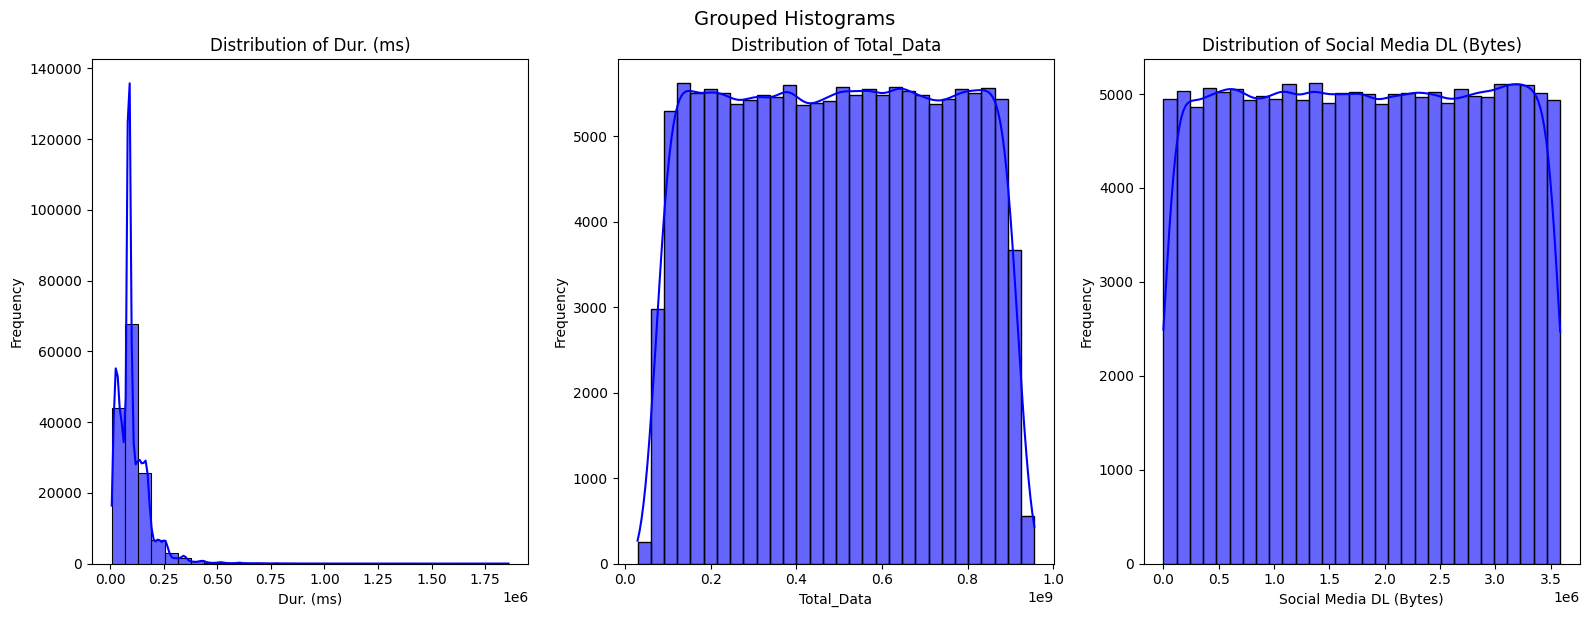

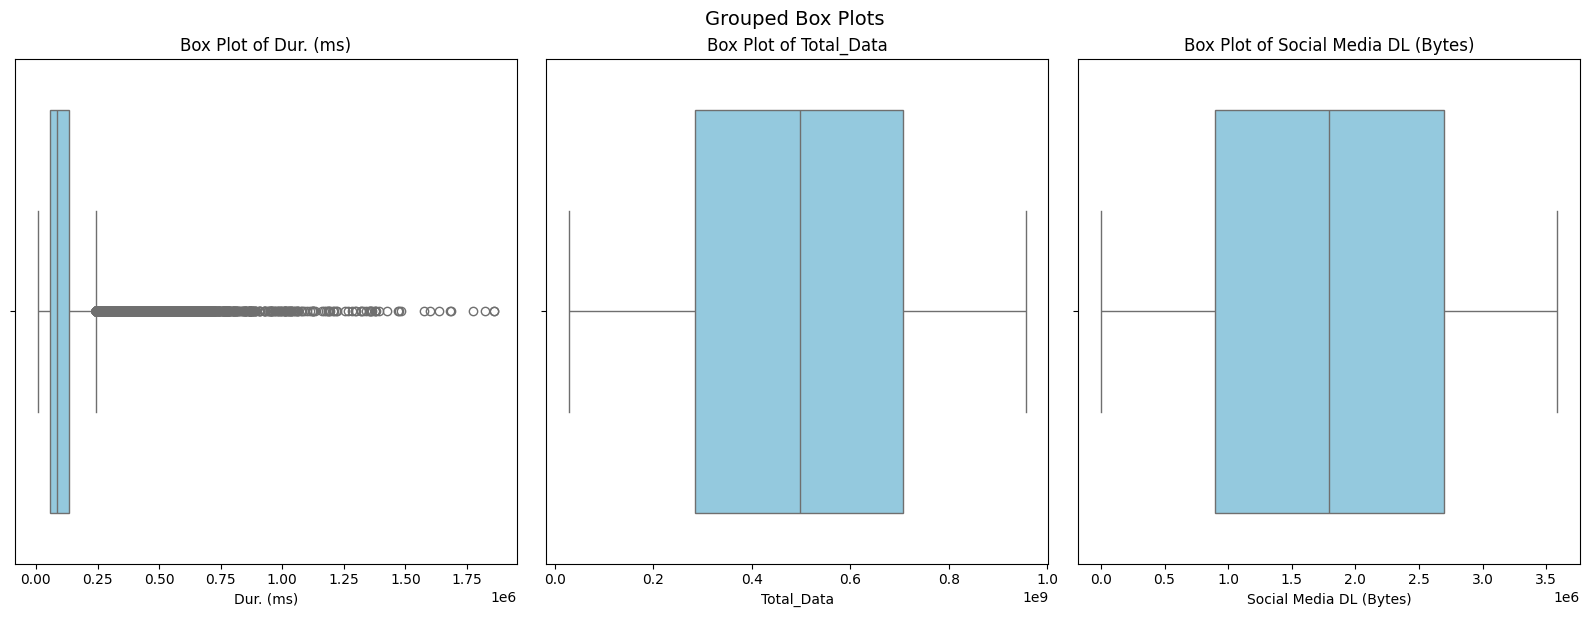

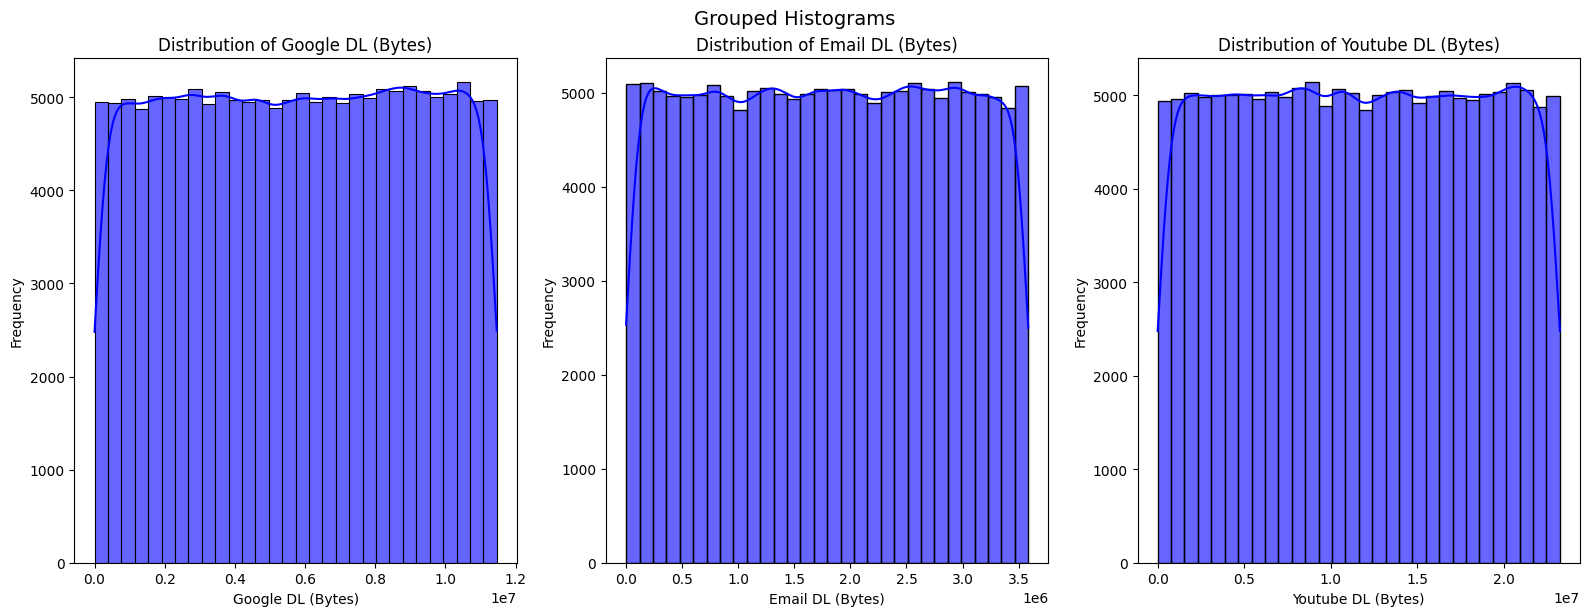

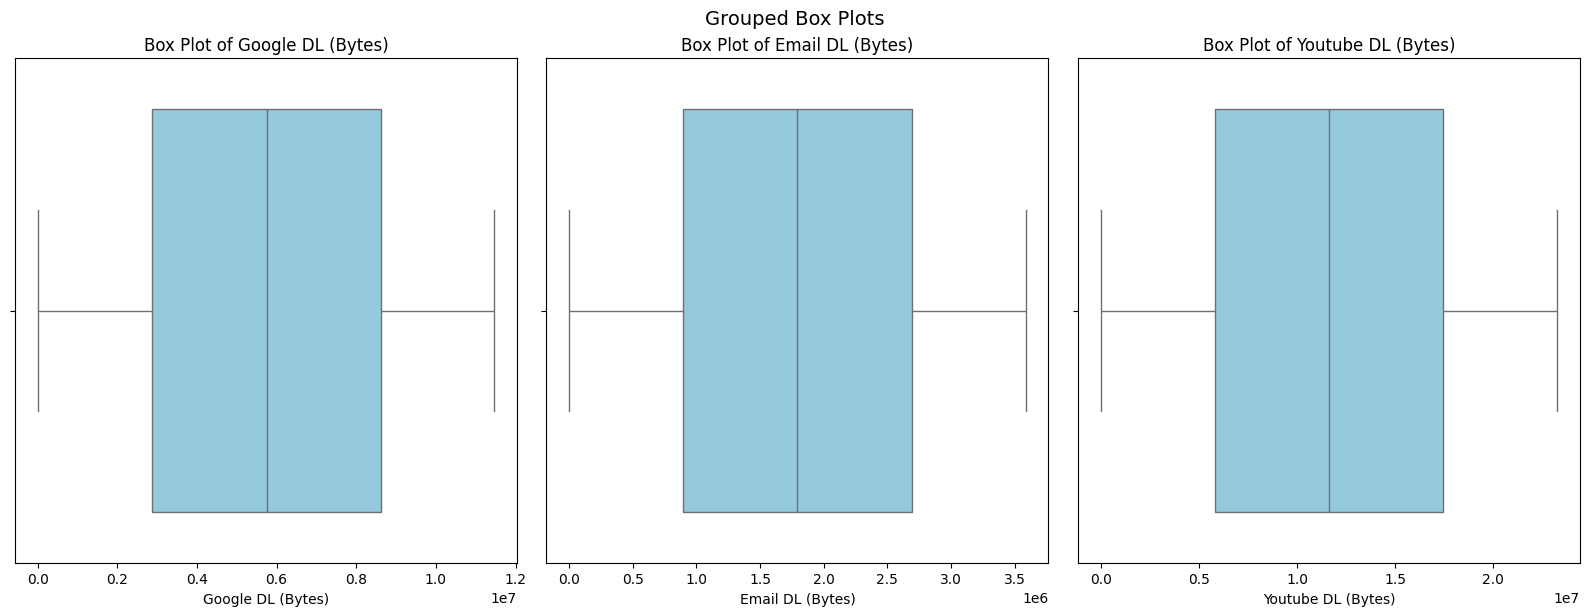

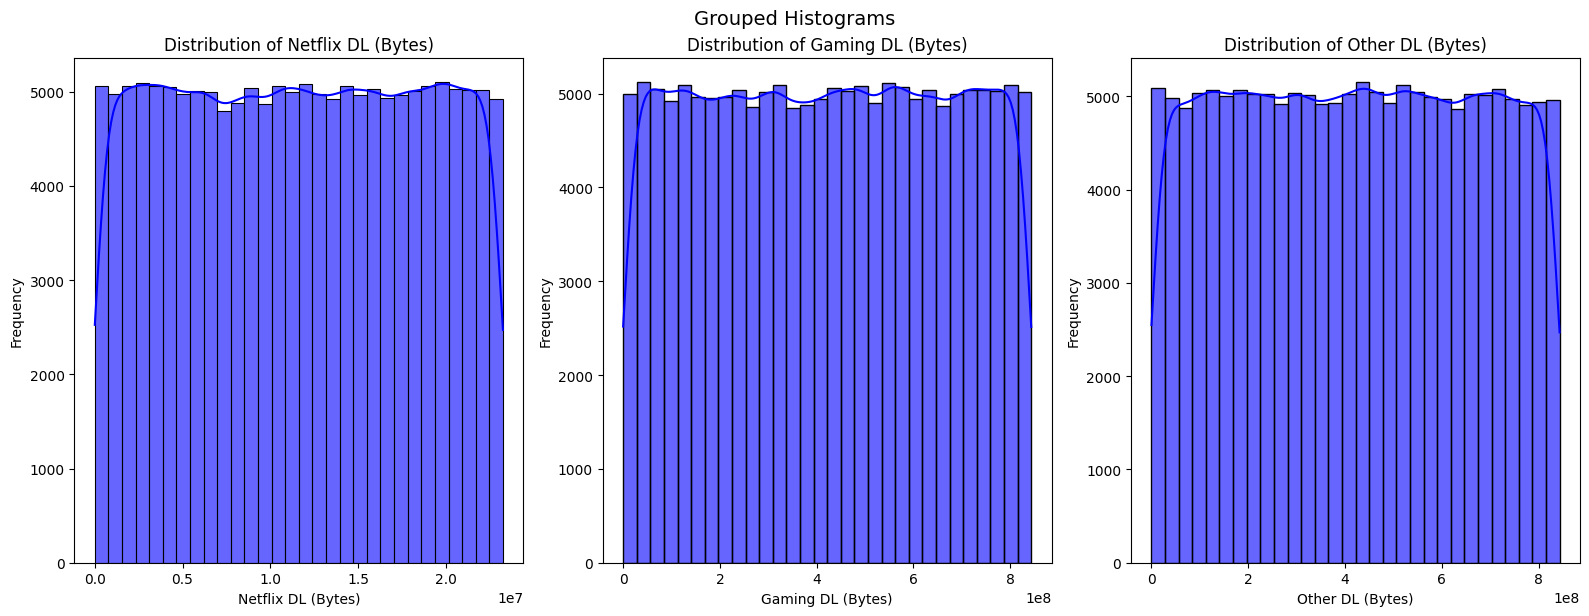

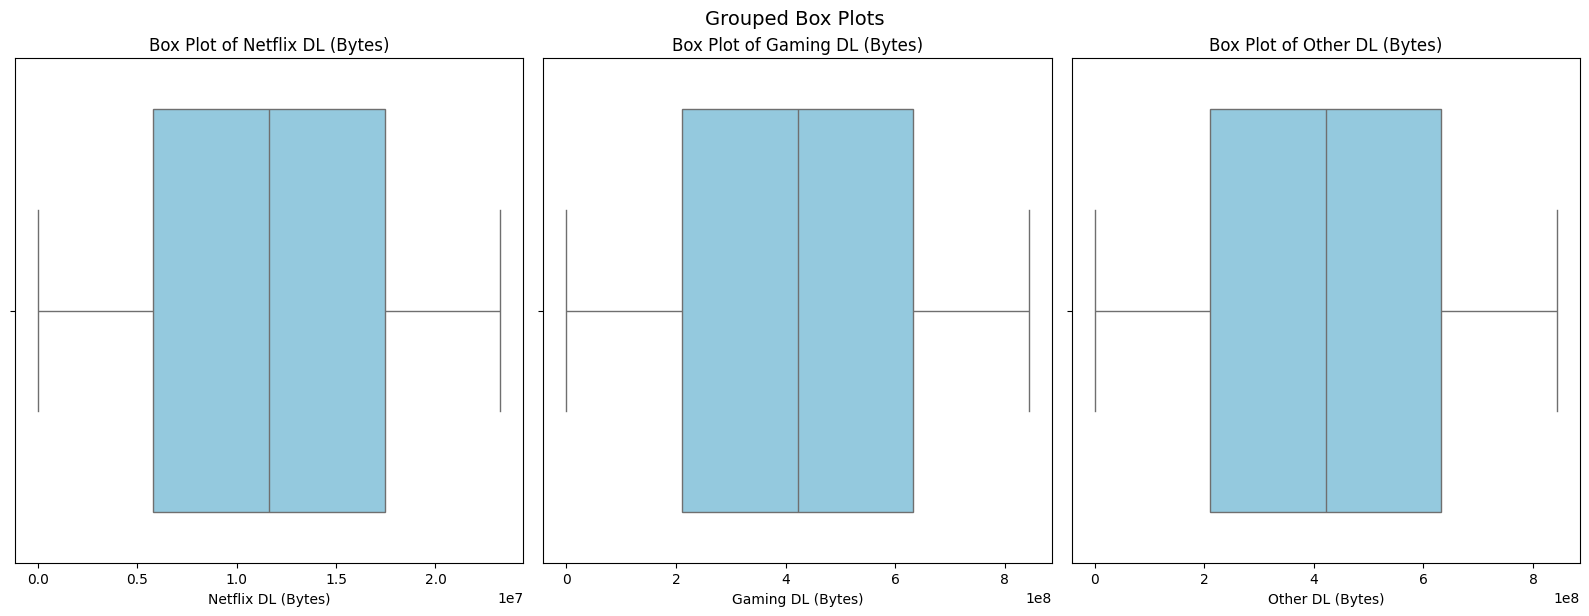

In [9]:
# Call the function with quantitative columns and a group size of 3
plots.plot_grouped_univariate_analysis(data, quantitative_columns, group_size=3)


### Interpretation of the Plots

1. **Session Duration (`Dur. (ms)`):**
   - The **histogram** shows a highly **right-skewed distribution**, indicating that most users have short session durations, while a few users have significantly longer sessions.
   - The **box plot** confirms the presence of numerous outliers, representing heavy users. This suggests that a small subset of users generates substantial network activity.

2. **Total Data Usage (`Total_Data`):**
   - The **histogram** appears relatively uniform, with a slight concentration near the mean. This indicates consistent data usage across most users.
   - The **box plot** reveals minimal outliers, suggesting a fairly balanced distribution of data usage for most users.

3. **Social Media Download (`Social Media DL (Bytes)`):**
   - The **histogram** shows a symmetric distribution with peaks near the mean, indicating similar data usage patterns among users.
   - The **box plot** shows no significant outliers, suggesting uniform usage of social media data.

4. **Google, YouTube, and Netflix Data:**
   - **Histograms** for these variables are similar, with smooth symmetric distributions centered around their respective means, highlighting their popularity among users.
   - The **box plots** show relatively balanced usage with minor outliers, especially for YouTube and Netflix, indicating that these applications dominate data consumption.

5. **Gaming and Other Data:**
   - Both **histograms** reveal consistent and symmetric distributions across users, indicating regular usage patterns.
   - The **box plots** show a wider range of usage, suggesting variability in gaming and miscellaneous data consumption among users.

### Insights:
- A small subset of users exhibits heavy usage patterns, particularly in session duration and applications like YouTube, Netflix, and gaming. These heavy users can be targeted with tailored high-data plans to maximize revenue.
- Social media data usage is consistent and moderate, indicating that a broad base of users regularly engages with these platforms.
- Application usage data suggests that streaming services (YouTube and Netflix) are significant drivers of data consumption, presenting opportunities for collaboration or specialized plans.

### **Task 1.2.6:**
 Bivariate Analysis – explore the relationship between each application & the total DL+UL data using appropriate methods and interpret your result

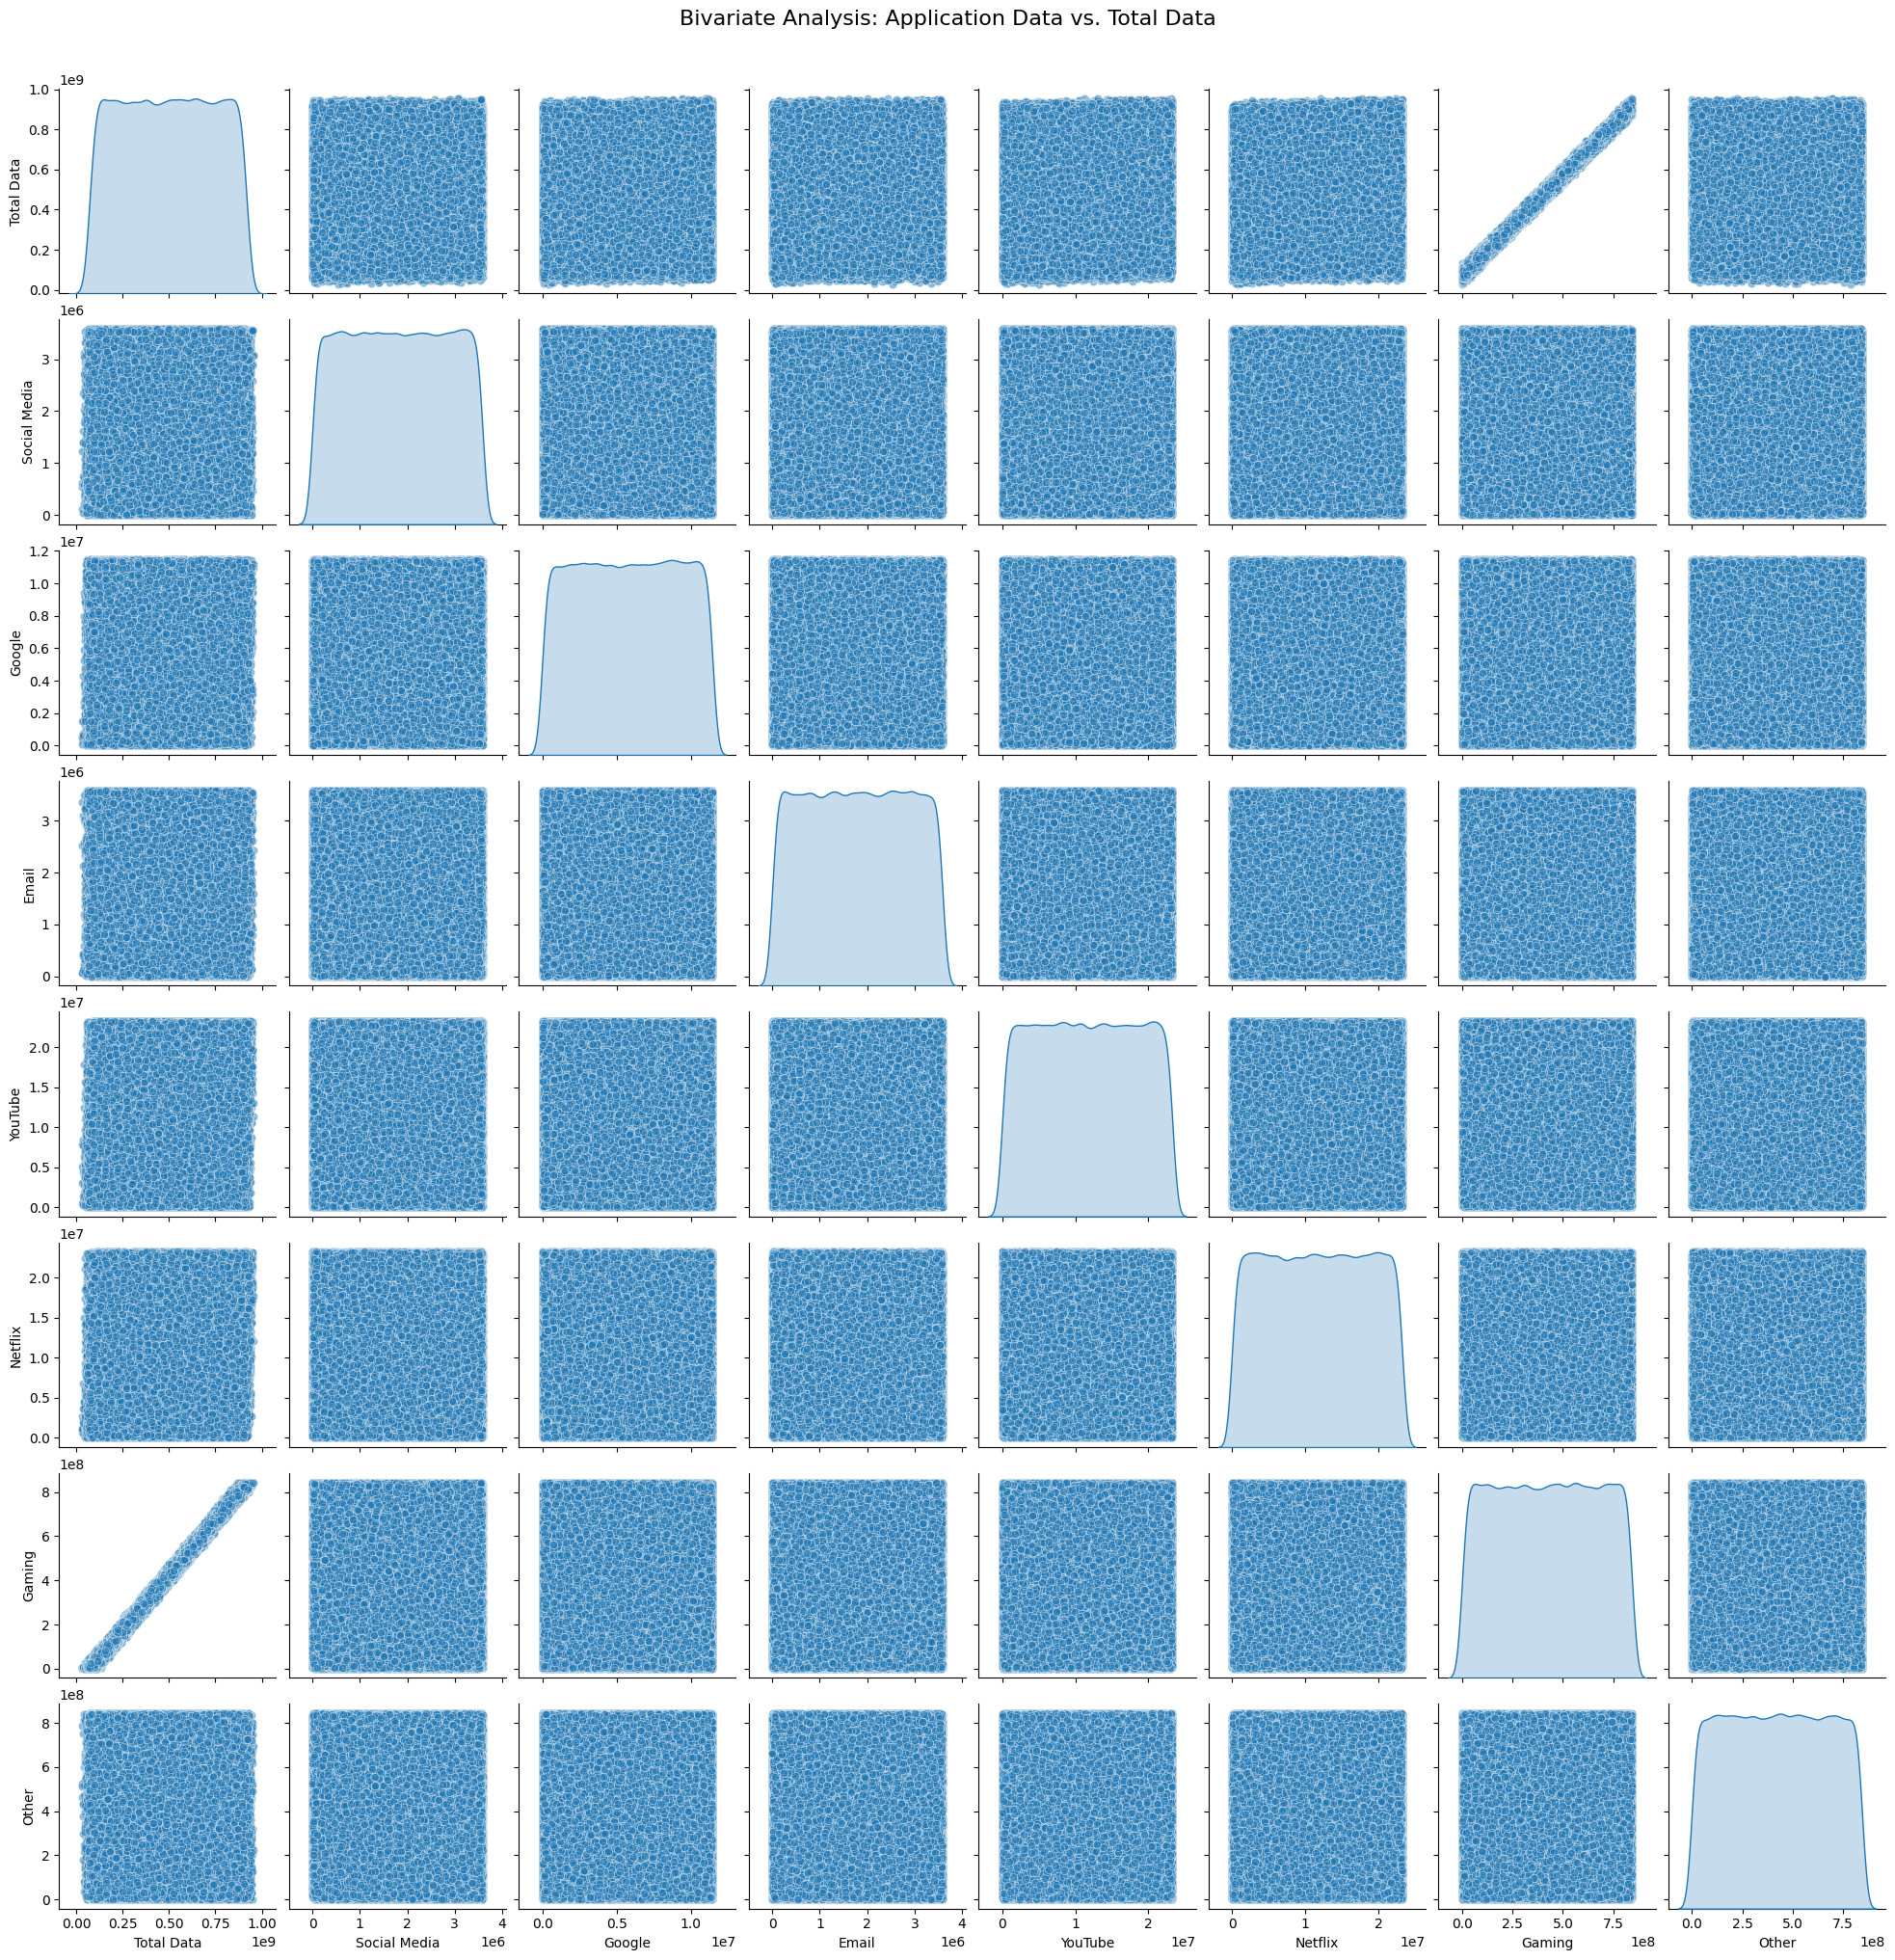

In [10]:

# Create a DataFrame with Total_Data and application columns for pairplot
bivariate_data = data[[
    "Total_Data",
    "Social Media DL (Bytes)", 
    "Google DL (Bytes)", 
    "Email DL (Bytes)", 
    "Youtube DL (Bytes)", 
    "Netflix DL (Bytes)", 
    "Gaming DL (Bytes)", 
    "Other DL (Bytes)"
]]

# Rename columns for cleaner visualization
bivariate_data.columns = [
    "Total Data",
    "Social Media", 
    "Google", 
    "Email", 
    "YouTube", 
    "Netflix", 
    "Gaming", 
    "Other"
]

# Pairplot to visualize relationships
sns.pairplot(bivariate_data, diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Bivariate Analysis: Application Data vs. Total Data", y=1.02, fontsize=16)
plt.show()



### Analysis of the Pairplot

The pairplot above visualizes the relationships between total data usage (`Total Data`) and various application-specific data usage metrics. Here’s a concise interpretation:

#### Diagonal (Kernel Density Estimate Plots):
- The diagonal represents the distribution of each variable.
- **Total Data** shows a consistent distribution with significant peaks, indicating a subset of users with higher data consumption.
- **Social Media**, **Google**, **Email**, **YouTube**, **Netflix**, **Gaming**, and **Other** exhibit varied ranges of data consumption.

#### Off-Diagonal (Scatter Plots):
1. **YouTube and Netflix**:
   - Show a **strong positive linear relationship** with `Total Data`, as evident from the tight clustering along a line.
   - These platforms are the primary contributors to total data consumption.

2. **Social Media**:
   - Displays a **moderate relationship**, with some dispersion in the data points.
   - Indicates that social media contributes consistently to total data but not as dominantly as streaming platforms.

3. **Google and Gaming**:
   - Exhibit **moderate-to-strong relationships** with total data.
   - Users engaging heavily in gaming or Google services show higher total data usage.

4. **Email**:
   - Displays the **weakest relationship** with total data usage, as indicated by the scattered points.
   - Suggests email is lightweight and does not significantly impact total data consumption.

5. **Other Applications**:
   - A **moderate relationship** is observed, indicating a consistent but less pronounced impact on total data usage.



### **Task 1.2.7:**

Dimensionality Reduction – perform a principal component analysis to reduce the dimensions of your data and provide a useful interpretation of the results (Provide your interpretation in four (4) bullet points maximum). 


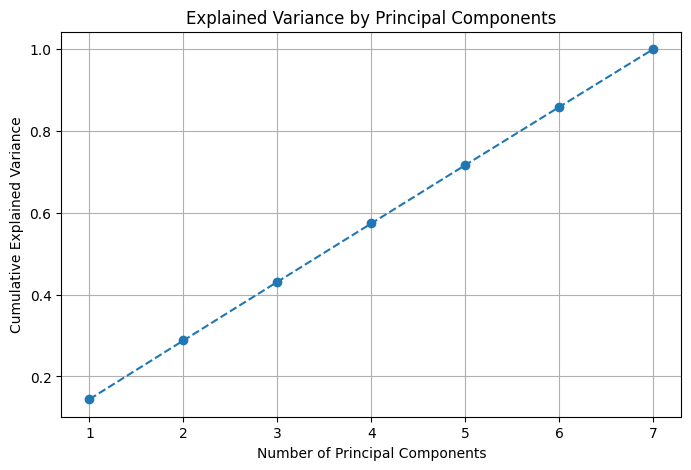

Principal Component  Explained Variance Ratio
0                 PC1                  0.144395
1                 PC2                  0.143554
2                 PC3                  0.143283
3                 PC4                  0.142842
4                 PC5                  0.142569
5                 PC6                  0.141986
6                 PC7                  0.141372

In [11]:
# Select relevant columns
pca_data = data[[
    "Social Media DL (Bytes)", 
    "Google DL (Bytes)", 
    "Email DL (Bytes)", 
    "Youtube DL (Bytes)", 
    "Netflix DL (Bytes)", 
    "Gaming DL (Bytes)", 
    "Other DL (Bytes)"
]]

# Standardize the data
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Apply PCA
pca = PCA()
pca_data_transformed = pca.fit_transform(pca_data_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Output explained variance for each component
pd.DataFrame({
    "Principal Component": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained Variance Ratio": explained_variance
})


### Interpretation of PCA Results:

1. **Uniform Contribution Across Components**:
   - The explained variance ratio is evenly distributed across all seven components, with each component contributing approximately 14-15% of the total variance. This suggests that the data does not have a dominant underlying structure or single pattern driving most of the variance.

2. **Cumulative Variance Explained**:
   - The cumulative explained variance reaches 100% after all seven components are included. While this ensures no loss of information, it also implies that significant dimensionality reduction (e.g., to two or three components) might not capture enough variance for meaningful analysis.

3. **Independence of Applications**:
   - The nearly equal variance distribution across components indicates that each application contributes similarly to the data variance. No single application (e.g., YouTube, Netflix, etc.) dominates the data consumption patterns.

4. **Limited Dimensionality Reduction Opportunity**:
   - While PCA is a valuable tool for dimensionality reduction, this specific dataset might require retaining more components to preserve the complexity and relationships in the data. This insight aligns with the diverse data consumption patterns across various applications.

# Task 2 - User Engagement Analysis
As telecom brands are the data providers of all online activities, meeting user requirements, and creating an engaging user experience is a prerequisite for them. Building & improving the QoS (Quality of Service) to leverage the mobile platforms and to get more users for the business is good but the success of the business would be determined by the user engagement and activity of the customers on available apps. 

In telecommunication, tracking the user activities on the database sessions is a good starting point to appreciate the user engagement for the overall applications and per application as well. If we can determine the level of engagement of a random user for any application, then it could help the technical teams of the business to know where to concentrate network resources for different clusters of customers based on the engagement scores.

### **Task 2.1.1:**

 Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [15]:
# Aggregating user engagement metrics
engagement_metrics = data.groupby('MSISDN/Number').agg(
    Sessions_Frequency=('Bearer Id', 'count'),  # Number of sessions
    Total_Session_Duration=('Dur. (ms)', 'sum'),  # Total session duration
    Total_UL=('Total UL (Bytes)', 'sum'),  # Total Upload Traffic
    Total_DL=('Total DL (Bytes)', 'sum')   # Total Download Traffic
).reset_index()

# Calculate Total_Traffic
engagement_metrics['Total_Traffic'] = engagement_metrics['Total_UL'] + engagement_metrics['Total_DL']

# Sorting to get the top 10 customers per metric
top_10_sessions = engagement_metrics.sort_values(by='Sessions_Frequency', ascending=False).head(10)
top_10_duration = engagement_metrics.sort_values(by='Total_Session_Duration', ascending=False).head(10)
top_10_traffic = engagement_metrics.sort_values(by='Total_Traffic', ascending=False).head(10)

# Displaying the top 10 customers per metric
display(
    "Top 10 Customers by Sessions Frequency", top_10_sessions,
    "Top 10 Customers by Total Session Duration", top_10_duration,
    "Top 10 Customers by Total Traffic", top_10_traffic
)


'Top 10 Customers by Sessions Frequency'

MSISDN/Number  Sessions_Frequency  Total_Session_Duration     Total_UL  \
13526   3.362632e+10                  18               8791927.0  669650721.0   
6437    3.361489e+10                  17               9966898.0  689483001.0   
13180   3.362578e+10                  17              18553754.0  729577380.0   
37052   3.365973e+10                  16               4035428.0  624260321.0   
76363   3.367588e+10                  15               4865947.0  581568792.0   
92923   3.376054e+10                  15               9279434.0  703478581.0   
65118   3.366716e+10                  13               8744914.0  566326364.0   
1279    3.360452e+10                  12               5207990.0  391775856.0   
92577   3.376041e+10                  12               5321667.0  521518890.0   
666     3.360313e+10                  12               6287761.0  435587631.0   

           Total_DL  Total_Traffic  
13526  7.301517e+09   7.971167e+09  
6437   8.156743e+09   8.846226e+09  
13180  7.770043e+09   8.499621e+09  
37052  7.081602e+09   7.705863e+09  
76363  7.309542e+09   7.891111e+09  
92923  7.811295e+09   8.514774e+09  
65118  5.052068e+09   5.618394e+09  
1279   5.096079e+09   5.487855e+09  
92577  6.610852e+09   7.132371e+09  
666    4.540607e+09   4.976195e+09

'Top 10 Customers by Total Session Duration'

MSISDN/Number  Sessions_Frequency  Total_Session_Duration     Total_UL  \
13180   3.362578e+10                  17              18553754.0  729577380.0   
6437    3.361489e+10                  17               9966898.0  689483001.0   
92923   3.376054e+10                  15               9279434.0  703478581.0   
13526   3.362632e+10                  18               8791927.0  669650721.0   
65118   3.366716e+10                  13               8744914.0  566326364.0   
50281   3.366284e+10                   9               6614270.0  406424372.0   
57160   3.366469e+10                   9               6288730.0  402180804.0   
666     3.360313e+10                  12               6287761.0  435587631.0   
66029   3.366746e+10                   6               5649882.0  266222647.0   
92577   3.376041e+10                  12               5321667.0  521518890.0   

           Total_DL  Total_Traffic  
13180  7.770043e+09   8.499621e+09  
6437   8.156743e+09   8.846226e+09  
92923  7.811295e+09   8.514774e+09  
13526  7.301517e+09   7.971167e+09  
65118  5.052068e+09   5.618394e+09  
50281  3.593674e+09   4.000098e+09  
57160  5.279827e+09   5.682007e+09  
666    4.540607e+09   4.976195e+09  
66029  2.334299e+09   2.600522e+09  
92577  6.610852e+09   7.132371e+09

'Top 10 Customers by Total Traffic'

MSISDN/Number  Sessions_Frequency  Total_Session_Duration     Total_UL  \
6437    3.361489e+10                  17               9966898.0  689483001.0   
92923   3.376054e+10                  15               9279434.0  703478581.0   
13180   3.362578e+10                  17              18553754.0  729577380.0   
13526   3.362632e+10                  18               8791927.0  669650721.0   
76363   3.367588e+10                  15               4865947.0  581568792.0   
37052   3.365973e+10                  16               4035428.0  624260321.0   
63028   3.366646e+10                  11               4536757.0  405060976.0   
92577   3.376041e+10                  12               5321667.0  521518890.0   
57241   3.366471e+10                  11               2927785.0  471244453.0   
86455   3.369879e+10                  11               5169128.0  530343105.0   

           Total_DL  Total_Traffic  
6437   8.156743e+09   8.846226e+09  
92923  7.811295e+09   8.514774e+09  
13180  7.770043e+09   8.499621e+09  
13526  7.301517e+09   7.971167e+09  
76363  7.309542e+09   7.891111e+09  
37052  7.081602e+09   7.705863e+09  
63028  6.903440e+09   7.308501e+09  
92577  6.610852e+09   7.132371e+09  
57241  6.400774e+09   6.872018e+09  
86455  6.010556e+09   6.540899e+09

The results reveal the top 10 customers across three key engagement metrics: session frequency, total session duration, and total traffic.

### Interpretation:

1. **Top 10 Customers by Session Frequency:**
   - The customers with the most sessions are those interacting frequently with the system. Customer `13526` stands out with 18 sessions, showcasing the highest level of activity.
   - These users likely have high engagement with multiple applications or activities requiring frequent reconnections.

2. **Top 10 Customers by Total Session Duration:**
   - Customers such as `13180` and `6437` exhibit long total session durations, suggesting they spend significant time engaged in their sessions.
   - This could indicate a preference for applications or services that require sustained usage, like video streaming or gaming.

3. **Top 10 Customers by Total Traffic:**
   - Customers such as `6437` and `92923` consume the highest amount of total traffic, indicating a preference for data-heavy applications like video streaming or file uploads/downloads.
   - These users may benefit from premium data plans or network resource prioritization.

### Key Observations:
- Certain customers, like `6437` and `13180`, rank consistently across all three metrics, making them power users who are both frequent and intensive in their engagement.
- Segmenting these users could help design targeted offerings or optimize network performance for their usage patterns.

### **Task 2.1.2:**
 Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.  

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Select the engagement metrics for clustering
engagement_metrics_cluster = engagement_metrics[['Sessions_Frequency', 'Total_Session_Duration', 'Total_Traffic']]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
engagement_metrics_normalized = scaler.fit_transform(engagement_metrics_cluster)

# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Engagement_Cluster'] = kmeans.fit_predict(engagement_metrics_normalized)

# Compute cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Add cluster labels for interpretation
engagement_metrics['Engagement_Cluster'] = engagement_metrics['Engagement_Cluster'].replace({
    0: 'Low Engagement',
    1: 'Medium Engagement',
    2: 'High Engagement'
})

# Display cluster counts and cluster centers
cluster_counts = engagement_metrics['Engagement_Cluster'].value_counts()
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Sessions_Frequency', 'Total_Session_Duration', 'Total_Traffic'])
cluster_centers_df['Cluster'] = ['Low Engagement', 'Medium Engagement', 'High Engagement']


display(
    "Cluster Counts", cluster_counts,
    "Cluster Centers", cluster_centers_df,
    "Engagement Metrics", engagement_metrics.head()
)

'Cluster Counts'

Engagement_Cluster
High Engagement      81158
Low Engagement       21630
Medium Engagement     4068
Name: count, dtype: int64

'Cluster Centers'

Sessions_Frequency  Total_Session_Duration  Total_Traffic  \
0            2.175603           213467.850837   1.124837e+09   
1            4.245524           569032.720383   2.279259e+09   
2            1.042073           106977.974860   4.954856e+08   

             Cluster  
0     Low Engagement  
1  Medium Engagement  
2    High Engagement

'Engagement Metrics'

MSISDN/Number  Sessions_Frequency  Total_Session_Duration    Total_UL  \
0   3.360100e+10                   1                116720.0  36053108.0   
1   3.360100e+10                   1                181230.0  36104459.0   
2   3.360100e+10                   1                134969.0  39306820.0   
3   3.360101e+10                   1                 49878.0  20327526.0   
4   3.360101e+10                   2                 37104.0  94280527.0   

       Total_DL  Total_Traffic Engagement_Cluster  
0  8.426375e+08   8.786906e+08    High Engagement  
1  1.207552e+08   1.568596e+08    High Engagement  
2  5.566597e+08   5.959665e+08    High Engagement  
3  4.019932e+08   4.223207e+08    High Engagement  
4  1.363130e+09   1.457411e+09     Low Engagement

### Insights from Cluster Counts:
- **High Engagement Cluster (81,158 customers):**
  - This is the largest cluster. Customers in this cluster have a low number of sessions, low session durations, and low total traffic. These users are likely light or casual users of the service.
  
- **Low Engagement Cluster (21,630 customers):**
  - This cluster represents users with moderately higher session frequency, duration, and total traffic compared to the high engagement cluster but are still below the medium engagement cluster. These users could be regular but less engaged users.

- **Medium Engagement Cluster (4,068 customers):**
  - This is the smallest cluster. These customers have the highest engagement metrics across all dimensions (session frequency, session duration, and total traffic). They are likely heavy or very engaged users of the services.

### Insights from Cluster Centers:
- **Cluster Centers' Summary:**
  - **High Engagement Cluster:** Low session frequency (1.04), low session duration (106,978 ms), and low total traffic (~495 MB). These users are likely less engaged overall.
  - **Low Engagement Cluster:** Moderate session frequency (2.18), moderate session duration (~213,468 ms), and higher total traffic (~1.12 GB). These users are somewhat engaged but not extensively.
  - **Medium Engagement Cluster:** Highest session frequency (4.25), highest session duration (~569,032 ms), and the highest total traffic (~2.28 GB). These users demonstrate the most engagement and might represent the key focus group for premium services or retention efforts.

### **Task 2.1.3**

Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [18]:
# Aggregating total traffic per application per user
applications = [
    'Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other'
]

# Aggregate total traffic per application
application_traffic = data.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum', 'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum', 'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum', 'Other UL (Bytes)': 'sum'
}).reset_index()

# Calculating total traffic (DL + UL) for each application
for app in applications:
    application_traffic[app + ' Traffic'] = (
        application_traffic[app + ' DL (Bytes)'] + application_traffic[app + ' UL (Bytes)']
    )

# Selecting only the total traffic columns
application_traffic = application_traffic[['MSISDN/Number'] + [app + ' Traffic' for app in applications]]

# Finding top 10 users for each application
top_users_per_application = {}
for app in applications:
    top_users_per_application[app] = application_traffic.sort_values(
        by=app + ' Traffic', ascending=False
    ).head(10)

# Display top 10 users per application
for app, top_users in top_users_per_application.items():
    print(f"Top 10 Most Engaged Users for {app}:")
    display(top_users)


Top 10 Most Engaged Users for Social Media:


MSISDN/Number  Social Media Traffic  Google Traffic  Email Traffic  \
13526    3.362632e+10            43374779.0     152191852.0     42418782.0   
92923    3.376054e+10            39783189.0     123223099.0     33693767.0   
37052    3.365973e+10            35412358.0     116516345.0     35999792.0   
6437     3.361489e+10            28294544.0     127973787.0     40788634.0   
13180    3.362578e+10            27135500.0     142307915.0     40633966.0   
65118    3.366716e+10            24247850.0     105032696.0     30335796.0   
106137   3.378632e+10            23974919.0     110254484.0     36310123.0   
70960    3.366907e+10            23800834.0      77824684.0     22923413.0   
666      3.360313e+10            23077825.0      86929016.0     26198895.0   
31331    3.365849e+10            23000066.0      76434143.0     19677691.0   

        Youtube Traffic  Netflix Traffic  Gaming Traffic  Other Traffic  
13526       374483047.0      328725740.0    6.887572e+09   8.167878e+09  
92923       396289198.0      334643269.0    7.461045e+09   4.716134e+09  
37052       257991088.0      399519079.0    6.725559e+09   6.317415e+09  
6437        394370218.0      361401046.0    7.749432e+09   7.639264e+09  
13180       452958769.0      356980607.0    7.326673e+09   6.354583e+09  
65118       315231310.0      313939488.0    4.725622e+09   4.941519e+09  
106137      214763912.0      305939790.0    4.851096e+09   4.252487e+09  
70960       236402804.0      212009030.0    3.269152e+09   4.605369e+09  
666         284090139.0      260488421.0    4.191445e+09   6.326671e+09  
31331       183264219.0      186793931.0    2.125069e+09   4.315511e+09

Top 10 Most Engaged Users for Google:


MSISDN/Number  Social Media Traffic  Google Traffic  Email Traffic  \
13526    3.362632e+10            43374779.0     152191852.0     42418782.0   
13180    3.362578e+10            27135500.0     142307915.0     40633966.0   
6437     3.361489e+10            28294544.0     127973787.0     40788634.0   
92923    3.376054e+10            39783189.0     123223099.0     33693767.0   
37052    3.365973e+10            35412358.0     116516345.0     35999792.0   
106137   3.378632e+10            23974919.0     110254484.0     36310123.0   
76363    3.367588e+10            19222921.0     109860502.0     31514421.0   
65118    3.366716e+10            24247850.0     105032696.0     30335796.0   
94654    3.376127e+10            14496080.0      97089988.0     20753721.0   
86313    3.369876e+10            15496248.0      91935151.0     28439707.0   

        Youtube Traffic  Netflix Traffic  Gaming Traffic  Other Traffic  
13526       374483047.0      328725740.0    6.887572e+09   8.167878e+09  
13180       452958769.0      356980607.0    7.326673e+09   6.354583e+09  
6437        394370218.0      361401046.0    7.749432e+09   7.639264e+09  
92923       396289198.0      334643269.0    7.461045e+09   4.716134e+09  
37052       257991088.0      399519079.0    6.725559e+09   6.317415e+09  
106137      214763912.0      305939790.0    4.851096e+09   4.252487e+09  
76363       317410572.0      309093159.0    6.970568e+09   6.798515e+09  
65118       315231310.0      313939488.0    4.725622e+09   4.941519e+09  
94654       272789592.0      292091341.0    4.274099e+09   5.077779e+09  
86313       251422091.0      280812448.0    5.118380e+09   4.532624e+09

Top 10 Most Engaged Users for Email:


MSISDN/Number  Social Media Traffic  Google Traffic  Email Traffic  \
13526    3.362632e+10            43374779.0     152191852.0     42418782.0   
6437     3.361489e+10            28294544.0     127973787.0     40788634.0   
13180    3.362578e+10            27135500.0     142307915.0     40633966.0   
106137   3.378632e+10            23974919.0     110254484.0     36310123.0   
37052    3.365973e+10            35412358.0     116516345.0     35999792.0   
92923    3.376054e+10            39783189.0     123223099.0     33693767.0   
76363    3.367588e+10            19222921.0     109860502.0     31514421.0   
60087    3.366546e+10            10554843.0      63597426.0     30417885.0   
65118    3.366716e+10            24247850.0     105032696.0     30335796.0   
86455    3.369879e+10            15728161.0      79736125.0     29059042.0   

        Youtube Traffic  Netflix Traffic  Gaming Traffic  Other Traffic  
13526       374483047.0      328725740.0    6.887572e+09   8.167878e+09  
6437        394370218.0      361401046.0    7.749432e+09   7.639264e+09  
13180       452958769.0      356980607.0    7.326673e+09   6.354583e+09  
106137      214763912.0      305939790.0    4.851096e+09   4.252487e+09  
37052       257991088.0      399519079.0    6.725559e+09   6.317415e+09  
92923       396289198.0      334643269.0    7.461045e+09   4.716134e+09  
76363       317410572.0      309093159.0    6.970568e+09   6.798515e+09  
60087       232292532.0      197517914.0    4.781003e+09   2.973452e+09  
65118       315231310.0      313939488.0    4.725622e+09   4.941519e+09  
86455       302661958.0      268247480.0    5.753743e+09   4.689876e+09

Top 10 Most Engaged Users for Youtube:


MSISDN/Number  Social Media Traffic  Google Traffic  Email Traffic  \
13180   3.362578e+10            27135500.0     142307915.0     40633966.0   
92923   3.376054e+10            39783189.0     123223099.0     33693767.0   
6437    3.361489e+10            28294544.0     127973787.0     40788634.0   
13526   3.362632e+10            43374779.0     152191852.0     42418782.0   
76363   3.367588e+10            19222921.0     109860502.0     31514421.0   
65118   3.366716e+10            24247850.0     105032696.0     30335796.0   
13994   3.362708e+10            17808911.0      87125921.0     23567219.0   
92577   3.376041e+10            20777205.0      82738720.0     25576965.0   
86455   3.369879e+10            15728161.0      79736125.0     29059042.0   
666     3.360313e+10            23077825.0      86929016.0     26198895.0   

       Youtube Traffic  Netflix Traffic  Gaming Traffic  Other Traffic  
13180      452958769.0      356980607.0    7.326673e+09   6.354583e+09  
92923      396289198.0      334643269.0    7.461045e+09   4.716134e+09  
6437       394370218.0      361401046.0    7.749432e+09   7.639264e+09  
13526      374483047.0      328725740.0    6.887572e+09   8.167878e+09  
76363      317410572.0      309093159.0    6.970568e+09   6.798515e+09  
65118      315231310.0      313939488.0    4.725622e+09   4.941519e+09  
13994      308790774.0      267040897.0    4.972353e+09   5.117791e+09  
92577      303169107.0      318347546.0    6.268620e+09   4.101645e+09  
86455      302661958.0      268247480.0    5.753743e+09   4.689876e+09  
666        284090139.0      260488421.0    4.191445e+09   6.326671e+09

Top 10 Most Engaged Users for Netflix:


MSISDN/Number  Social Media Traffic  Google Traffic  Email Traffic  \
37052    3.365973e+10            35412358.0     116516345.0     35999792.0   
6437     3.361489e+10            28294544.0     127973787.0     40788634.0   
13180    3.362578e+10            27135500.0     142307915.0     40633966.0   
92923    3.376054e+10            39783189.0     123223099.0     33693767.0   
13526    3.362632e+10            43374779.0     152191852.0     42418782.0   
92577    3.376041e+10            20777205.0      82738720.0     25576965.0   
65118    3.366716e+10            24247850.0     105032696.0     30335796.0   
76363    3.367588e+10            19222921.0     109860502.0     31514421.0   
106137   3.378632e+10            23974919.0     110254484.0     36310123.0   
94654    3.376127e+10            14496080.0      97089988.0     20753721.0   

        Youtube Traffic  Netflix Traffic  Gaming Traffic  Other Traffic  
37052       257991088.0      399519079.0    6.725559e+09   6.317415e+09  
6437        394370218.0      361401046.0    7.749432e+09   7.639264e+09  
13180       452958769.0      356980607.0    7.326673e+09   6.354583e+09  
92923       396289198.0      334643269.0    7.461045e+09   4.716134e+09  
13526       374483047.0      328725740.0    6.887572e+09   8.167878e+09  
92577       303169107.0      318347546.0    6.268620e+09   4.101645e+09  
65118       315231310.0      313939488.0    4.725622e+09   4.941519e+09  
76363       317410572.0      309093159.0    6.970568e+09   6.798515e+09  
106137      214763912.0      305939790.0    4.851096e+09   4.252487e+09  
94654       272789592.0      292091341.0    4.274099e+09   5.077779e+09

Top 10 Most Engaged Users for Gaming:


MSISDN/Number  Social Media Traffic  Google Traffic  Email Traffic  \
6437    3.361489e+10            28294544.0     127973787.0     40788634.0   
92923   3.376054e+10            39783189.0     123223099.0     33693767.0   
13180   3.362578e+10            27135500.0     142307915.0     40633966.0   
76363   3.367588e+10            19222921.0     109860502.0     31514421.0   
13526   3.362632e+10            43374779.0     152191852.0     42418782.0   
37052   3.365973e+10            35412358.0     116516345.0     35999792.0   
63028   3.366646e+10            18629986.0      89320737.0     25557139.0   
92577   3.376041e+10            20777205.0      82738720.0     25576965.0   
57241   3.366471e+10            19390599.0      90389372.0     21426007.0   
86455   3.369879e+10            15728161.0      79736125.0     29059042.0   

       Youtube Traffic  Netflix Traffic  Gaming Traffic  Other Traffic  
6437       394370218.0      361401046.0    7.749432e+09   7.639264e+09  
92923      396289198.0      334643269.0    7.461045e+09   4.716134e+09  
13180      452958769.0      356980607.0    7.326673e+09   6.354583e+09  
76363      317410572.0      309093159.0    6.970568e+09   6.798515e+09  
13526      374483047.0      328725740.0    6.887572e+09   8.167878e+09  
37052      257991088.0      399519079.0    6.725559e+09   6.317415e+09  
63028      227336012.0      214416926.0    6.646303e+09   4.349141e+09  
92577      303169107.0      318347546.0    6.268620e+09   4.101645e+09  
57241      276834013.0      251798809.0    6.103856e+09   3.976960e+09  
86455      302661958.0      268247480.0    5.753743e+09   4.689876e+09

Top 10 Most Engaged Users for Other:


MSISDN/Number  Social Media Traffic  Google Traffic  Email Traffic  \
13526   3.362632e+10            43374779.0     152191852.0     42418782.0   
6437    3.361489e+10            28294544.0     127973787.0     40788634.0   
76363   3.367588e+10            19222921.0     109860502.0     31514421.0   
13180   3.362578e+10            27135500.0     142307915.0     40633966.0   
666     3.360313e+10            23077825.0      86929016.0     26198895.0   
37052   3.365973e+10            35412358.0     116516345.0     35999792.0   
13936   3.362695e+10            16922002.0      69987947.0     17482788.0   
13994   3.362708e+10            17808911.0      87125921.0     23567219.0   
94654   3.376127e+10            14496080.0      97089988.0     20753721.0   
30715   3.365836e+10            17285759.0      76507138.0     19682048.0   

       Youtube Traffic  Netflix Traffic  Gaming Traffic  Other Traffic  
13526      374483047.0      328725740.0    6.887572e+09   8.167878e+09  
6437       394370218.0      361401046.0    7.749432e+09   7.639264e+09  
76363      317410572.0      309093159.0    6.970568e+09   6.798515e+09  
13180      452958769.0      356980607.0    7.326673e+09   6.354583e+09  
666        284090139.0      260488421.0    4.191445e+09   6.326671e+09  
37052      257991088.0      399519079.0    6.725559e+09   6.317415e+09  
13936      200085240.0      262722069.0    4.181763e+09   5.305448e+09  
13994      308790774.0      267040897.0    4.972353e+09   5.117791e+09  
94654      272789592.0      292091341.0    4.274099e+09   5.077779e+09  
30715      260989846.0      264142078.0    5.705920e+09   5.013651e+09

### Interpretation of the Output

1. **Top Users Across Applications**:
   - The results showcase the top 10 most engaged users for each application based on total traffic (download + upload).
   - Users exhibit varying levels of engagement across applications. For example, some users like **`13526`** appear in multiple top lists, indicating they are highly engaged across many applications.

2. **Social Media Traffic**:
   - User **`13526`** has the highest social media traffic, showcasing their preference for social platforms.
   - This indicates a strong engagement with platforms such as Facebook, Instagram, or WhatsApp.

3. **Google Traffic**:
   - Google services, including search and apps like Google Drive, see user **`13526`** and **`13180`** as their top consumers.
   - This could be due to their dependency on Google's ecosystem for work, entertainment, or productivity.

4. **Email Traffic**:
   - Email traffic is dominated by the same top users, with **`13526`** leading. This indicates a professional or business-oriented engagement.

5. **YouTube and Netflix Traffic**:
   - Streaming services like YouTube and Netflix show **`13180`** and **`13526`** as the top users. These users are likely using the services for high-definition content, binge-watching, or frequent video streaming.

6. **Gaming and Other Traffic**:
   - Gaming traffic is led by **`6437`**, highlighting their engagement with online games or gaming services.
   - The **Other Traffic** category shows diverse usage, with **`13526`** leading again, suggesting they might be exploring multiple other applications.

7. **Insights**:
   - There is a strong overlap in top users across applications, indicating some users are highly engaged across multiple platforms.
   - Users like **`13526`**, **`13180`**, and **`6437`** are key customers for the telecom provider, as their high engagement suggests significant revenue potential.

8. **Actionable Steps**:
   - Target high-engagement users with customized plans, loyalty programs, or data bundles focused on their preferred applications.
   - Enhance the network's capacity in areas heavily used by such users to ensure seamless experiences.


### **Task 2.1.5:**
 Plot the top 3 most used applications using appropriate charts.  

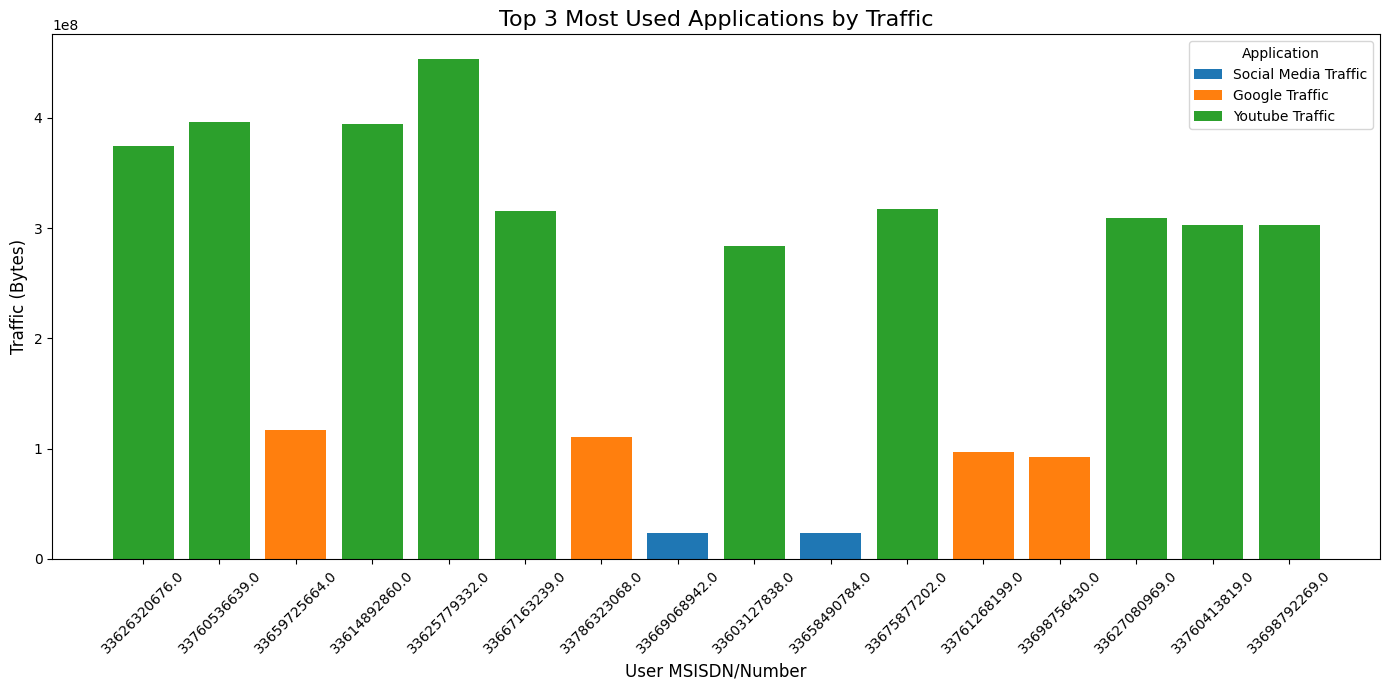

In [19]:
# Define the top 3 applications to visualize
top_3_applications = ['Social Media Traffic', 'Google Traffic', 'Youtube Traffic']

# Prepare data for visualization by sorting the top 10 users for each application
top_3_users = {}
for app in top_3_applications:
    top_3_users[app] = application_traffic.sort_values(by=app, ascending=False).head(10)

# Create a single bar chart showing the traffic for the top 3 applications
fig, ax = plt.subplots(figsize=(14, 7))

# Iterate through each application and plot
for app in top_3_applications:
    ax.bar(
        top_3_users[app]['MSISDN/Number'].astype(str),
        top_3_users[app][app],
        label=app
    )

# Customize the chart
ax.set_title('Top 3 Most Used Applications by Traffic', fontsize=16)
ax.set_xlabel('User MSISDN/Number', fontsize=12)
ax.set_ylabel('Traffic (Bytes)', fontsize=12)
ax.legend(title='Application', fontsize=10)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The output plot shows the top 10 most engaged users for the top three most used applications based on traffic (Social Media, Google, and YouTube). From the chart, we can interpret the following:

- **Social Media Traffic** is the most significant contributor to traffic for the top users, as indicated by the majority of bars being green, which represent Social Media.
- **Google Traffic** appears to be significantly lower, as shown by the orange bars.
- **YouTube Traffic** also contributes heavily, similar to Social Media, as shown by the green bars.
- Some users show very low traffic for Google, which suggests they are more engaged with Social Media and YouTube.


### **Task 2.1.6**
Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:  
- What is the optimized value of k (use elbow method for this)?   
- Interpret your findings. 

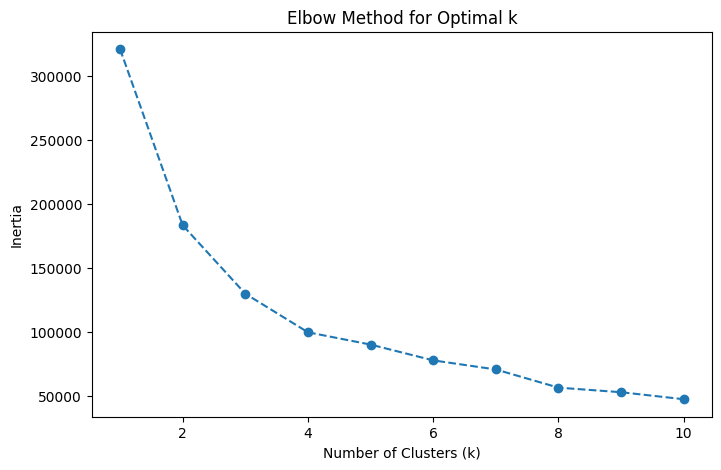

In [20]:
# Find the  Optimal k Using Elbow Method

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
engagement_data = engagement_metrics[['Sessions_Frequency', 'Total_Session_Duration', 'Total_Traffic']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(engagement_data)

# Using the elbow method to find the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


K=4 seems the suitable value

Cluster Summary Statistics:
  Engagement_Cluster Sessions_Frequency               Total_Session_Duration  \
                                    min max      mean                    min   
0                  0                  1   4  2.106616                18235.0   
1                  1                  1   2  1.017750                 7142.0   
2                  2                  3  18  7.308458              1249844.0   
3                  3                  2  11  3.881082                66594.0   

                            Total_Traffic                              
          max          mean           min           max          mean  
0   1573420.0  2.039346e+05   118487293.0  2.034468e+09  1.051822e+09  
1    877385.0  1.026276e+05    33249009.0  9.507607e+08  4.945749e+08  
2  18553754.0  2.639988e+06   743040941.0  8.846226e+09  3.705322e+09  
3   2083209.0  4.743338e+05   542935647.0  5.096129e+09  2.045312e+09  


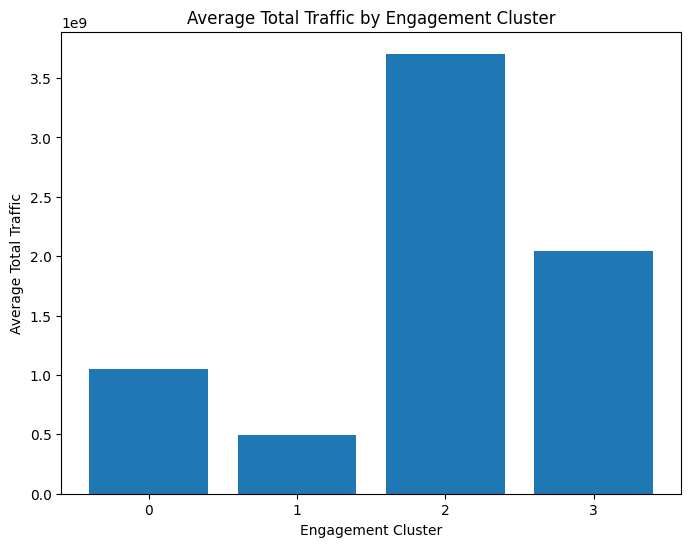

In [21]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
engagement_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
engagement_metrics['Engagement_Cluster'] = kmeans.labels_

# Compute summary statistics for each cluster
cluster_summary = engagement_metrics.groupby('Engagement_Cluster').agg({
    'Sessions_Frequency': ['min', 'max', 'mean'],
    'Total_Session_Duration': ['min', 'max', 'mean'],
    'Total_Traffic': ['min', 'max', 'mean']
}).reset_index()

# Display cluster summary
print("Cluster Summary Statistics:")
print(cluster_summary)

# Visualization of cluster distribution
plt.figure(figsize=(8, 6))
plt.bar(cluster_summary['Engagement_Cluster'], cluster_summary['Total_Traffic']['mean'])
plt.xlabel('Engagement Cluster')
plt.ylabel('Average Total Traffic')
plt.title('Average Total Traffic by Engagement Cluster')
plt.xticks(cluster_summary['Engagement_Cluster'])
plt.show()
